In [3]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [12]:
#importing the training data
imdb_data=pd.read_csv('IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [5]:
#Summary of the dataset
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
#sentiment count
imdb_data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [7]:
#split the dataset  
#train dataset
train_reviews=imdb_data.review[:40000]
train_sentiments=imdb_data.sentiment[:40000]
#test dataset
test_reviews=imdb_data.review[40000:]
test_sentiments=imdb_data.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


In [8]:
import nltk
nltk.download('stopwords')
import nltk
nltk.data.path.append("/path/to/your/nltk_data/")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [10]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)

C:\Users\MSI\AppData\Local\Temp\ipykernel_12872\841911545.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [11]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

In [14]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

In [15]:
#normalized train reviews
norm_train_reviews=imdb_data.review[:40000]
norm_train_reviews[0]
#convert dataframe to string
#norm_train_string=norm_train_reviews.to_string()
#Spelling correction using Textblob
#norm_train_spelling=TextBlob(norm_train_string)
#norm_train_spelling.correct()
#Tokenization using Textblob
#norm_train_words=norm_train_spelling.words
#norm_train_words

"one of the other review ha mention that after watch just 1 oz episod you'll be hooked. they are right, as thi is exactli what happen with me.<br /><br />the first thing that struck me about oz wa it brutal and unflinch scene of violence, which set in right from the word go. trust me, thi is not a show for the faint heart or timid. thi show pull no punch with regard to drugs, sex or violence. it is hardcore, in the classic use of the word.<br /><br />it is call oz as that is the nicknam given to the oswald maximum secur state penitentary. it focu mainli on emerald city, an experi section of the prison where all the cell have glass front and face inwards, so privaci is not high on the agenda. em citi is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgi deal and shadi agreement are never far away.<br /><br />i would say the main appeal of the show is due to the fact that it goe where other show wouldn't dare. forget

In [16]:
#Normalized test reviews
norm_test_reviews=imdb_data.review[40000:]
norm_test_reviews[45005]
##convert dataframe to string
#norm_test_string=norm_test_reviews.to_string()
#spelling correction using Textblob
#norm_test_spelling=TextBlob(norm_test_string)
#print(norm_test_spelling.correct())
#Tokenization using Textblob
#norm_test_words=norm_test_spelling.words
#norm_test_words

"i read all the review here after watch thi piec of cinemat garbag and it took me at least 2 page to find out that somebodi el didn't think that thi appallingli unfunni montag wasn't the acm of humour in the 70 or ind in ani other era! if thi isn't the least funni set of sketch *comedy* i'v ever seen it'll do till it come along. half of the skit had alreadi been done (and infinit better) by act such as monti python and woodi allen... if i wa to say that a nice piec of anim that last about 90 second is the highlight of thi film it would still not get close to sum up just how mindless and drivel-ridden thi wast of 75 minut is. semin comedy? onli in the world where semin realli doe mean semen. scatolog humour? onli in a world where scat is actual feces. precursor jokes? onli if by that we mean that thi is a handbook of how not to do comedy. tit and bum and the odd beaver. nice...if you are a pubesc boy with at least one hand free and haven't found out that playboy exists. give it a break 

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with appropriate parameters
cv = CountVectorizer(min_df=1, max_df=1.0, binary=False, ngram_range=(1,3))

# Transform train reviews
cv_train_reviews = cv.fit_transform(norm_train_reviews)

# Transform test reviews
cv_test_reviews = cv.transform(norm_test_reviews)

# Print shape of transformed data
print('BOW_cv_train:', cv_train_reviews.shape)
print('BOW_cv_test:', cv_test_reviews.shape)

# Optionally, print the vocabulary (feature names)
# vocab = cv.get_feature_names_out()  # Uncomment if you want to see feature names
# print('Vocabulary size:', len(vocab))


BOW_cv_train: (40000, 7356208)
BOW_cv_test: (10000, 7356208)


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer with corrected parameters
tv = TfidfVectorizer(min_df=1, max_df=1.0, use_idf=True, ngram_range=(1,3))

# Transform train reviews
tv_train_reviews = tv.fit_transform(norm_train_reviews)

# Transform test reviews
tv_test_reviews = tv.transform(norm_test_reviews)

# Print shape of transformed data
print('Tfidf_train:', tv_train_reviews.shape)
print('Tfidf_test:', tv_test_reviews.shape)

# Optionally, print the vocabulary (feature names)
# vocab = tv.get_feature_names_out()  # Uncomment if you want to see feature names
# print('Vocabulary size:', len(vocab))


Tfidf_train: (40000, 7356208)
Tfidf_test: (10000, 7356208)


In [22]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [23]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)


[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [24]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

C:\Users\MSI\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


C:\Users\MSI\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


In [25]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 1 ... 1 1 0]
[0 0 0 ... 1 0 0]


In [26]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7952
lr_tfidf_score : 0.8865


In [27]:
#Classification report for bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.92      0.65      0.76      4993
    Negative       0.73      0.94      0.82      5007

    accuracy                           0.80     10000
   macro avg       0.82      0.79      0.79     10000
weighted avg       0.82      0.80      0.79     10000

              precision    recall  f1-score   support

    Positive       0.89      0.88      0.89      4993
    Negative       0.88      0.90      0.89      5007

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [28]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[4714  293]
 [1755 3238]]
[[4489  518]
 [ 617 4376]]


In [29]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

C:\Users\MSI\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=500, random_state=42)


C:\Users\MSI\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=500, random_state=42)


In [30]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[0 0 1 ... 1 1 0]
[0 0 0 ... 1 1 0]


In [31]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.7989
svm_tfidf_score : 0.8851


In [32]:
#Classification report for bag of words 
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.91      0.66      0.77      4993
    Negative       0.74      0.93      0.82      5007

    accuracy                           0.80     10000
   macro avg       0.82      0.80      0.80     10000
weighted avg       0.82      0.80      0.80     10000

              precision    recall  f1-score   support

    Positive       0.90      0.87      0.88      4993
    Negative       0.87      0.90      0.89      5007

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [33]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[4672  335]
 [1676 3317]]
[[4511  496]
 [ 653 4340]]


In [34]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

C:\Users\MSI\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


C:\Users\MSI\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


In [35]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)


[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [36]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.8766
mnb_tfidf_score : 0.8915


In [37]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.84      0.93      0.88      4993
    Negative       0.92      0.83      0.87      5007

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

              precision    recall  f1-score   support

    Positive       0.87      0.92      0.89      4993
    Negative       0.91      0.87      0.89      5007

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [38]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[4142  865]
 [ 369 4624]]
[[4345  662]
 [ 423 4570]]


<function matplotlib.pyplot.show(close=None, block=None)>

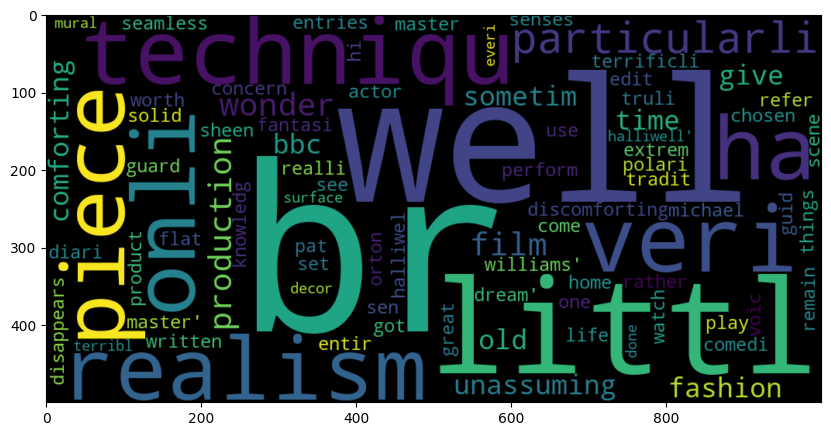

In [39]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

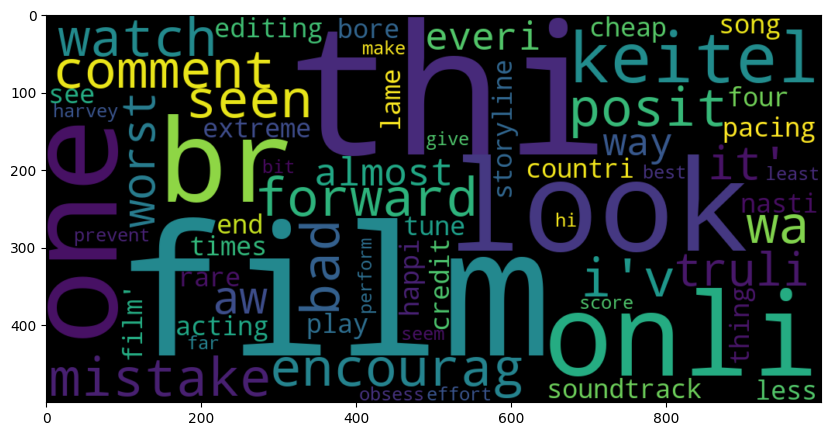

In [40]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

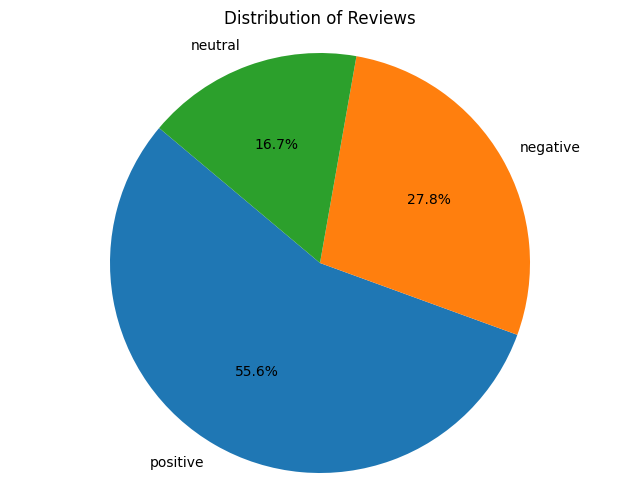

In [41]:
import matplotlib.pyplot as plt

# Example categories (replace with your actual categories or labels)
categories = ['positive', 'negative', 'neutral']  # Example categories
category_counts = [100, 50, 30]  # Example counts for each category

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [43]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_sentiment(review):
    # Analyze sentiment
    scores = sid.polarity_scores(review)
    
    # Determine sentiment label based on compound score
    compound_score = scores['compound']
    if compound_score >= 0.05:
        sentiment = 'positive'
    elif compound_score <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    
    return sentiment

# Function to get reviews dynamically (for example, user input)
def get_dynamic_reviews():
    reviews = []
    while True:
        review = input("Enter a review (type 'exit' to finish): ")
        if review.lower() == 'exit':
            break
        reviews.append(review)
    return reviews

# Main function to classify sentiments for dynamic reviews
def classify_sentiments():
    reviews = get_dynamic_reviews()
    
    for review in reviews:
        sentiment = get_sentiment(review)
        print(f"The sentiment of the review '{review}' is {sentiment}.")

# Call the main function to start sentiment classification
classify_sentiments()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Enter a review (type 'exit' to finish):  exit


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import tkinter as tk
from tkinter import messagebox

# Initialize VADER sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def get_sentiment(review):
    # Analyze sentiment
    scores = sid.polarity_scores(review)
    
    # Determine sentiment label based on compound score
    compound_score = scores['compound']
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Function to process reviews entered in the GUI
def process_reviews():
    review_text = review_entry.get("1.0",'end-1c')  # Get review text from text widget
    
    if review_text.strip() == "":
        messagebox.showwarning("Warning", "Please enter a review.")
        return
    
    sentiment = get_sentiment(review_text)
    sentiment_label.config(text=f"Sentiment: {sentiment.capitalize()}")

# Create GUI window
root = tk.Tk()
root.title("Sentiment Analysis")

# Review input area
review_label = tk.Label(root, text="Enter your review:")
review_label.pack(pady=10)

review_entry = tk.Text(root, height=5, width=50)
review_entry.pack(padx=10)

# Button to process review
process_button = tk.Button(root, text="Process Review", command=process_reviews)
process_button.pack(pady=10)

# Display sentiment result
sentiment_label = tk.Label(root, text="Sentiment:")
sentiment_label.pack(pady=10)

# Start the GUI main loop
root.mainloop()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
